# Tarea 11.8

#### Gonzalo Guerrero Valenzuela 20.505.512-6

---------------------------------------------------------------------------------------------------------------------------------------------

El sistema de ecuaciones a resolver es:

$$
y_{1}^{\prime} = -4y_1 - 2y_2 + \cos{t} +4\sin{t}
$$

$$
y_{2}^{\prime} = 3y_1 + y_2 - 3\sin{t}
$$

en el intervalo $0\leq t \leq 2$ y con las condiciones $y_{1}(0)=0$  y  $y_2(t)=-1$. Siguiendo los pasos de la clase modificamos el metodo de Runge-Kutta-Fehlberg.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

class MinStep(Exception):
    pass

def rkf_sist(f, a, b, yo, tol, hmin, hmax):
    """Metodo de Runge-Kutta-Fehlberg para sistemas de ecuaciones diferenciales."""
    yo = np.array(yo)
    
    
    t = a
    w = yo
    h = hmax
    flag = 1
    
    ts = [t]
    sol = [[w[i]] for i in range(len(yo))] #las soluciones deben ser del tamaño de las condiciones iniciales
    hs = []
    rs = []
    
    while flag:
        
        # Evaluaciones de la función 
        k1 = h*f(t, w)
        k2 = h*f(t + h/4, w + k1/4)
        k3 = h*f(t + 3*h/8, w + 3*k1/32 + 9*k2/32)
        k4 = h*f(t + 12*h/13, w + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h*f(t + h, w + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h*f(t + h/2, w - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
        
        # Estima del error dada por la diferencia entre dos RKs
        R = np.max(np.abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55))
        # Si el error es menor que la tolerancia, se acepta el paso
        if R <= tol:
            t += h
            w = w + 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5
            ts.append(t)
            for i in range(len(yo)):
                sol[i].append(w[i])
            hs.append(h)
            rs.append(R)
            
        # el 0.84 es un factor para hacer la estima más conservadora 
        # corresponde a 1/2**(1/4)
        q = 0.84*(tol/R)**(1/4)
        
        # ACTUALIZACIÓN DE h
        # Se establece un q mínimo para no quedarse atrapado en alguna región.
        # Esto se puede cambiar.
        if q <= 0.1:
            h = 0.1*h
        # Se establece también un q máximo para no peder detalles de la función
        elif q >= 4:
            h = 4*h
        else:
            h = q*h
        if h > hmax:
            h = hmax
        
        # Si nos pasamos de b, terminamos
        if t >= b:
            flag = 0
        # El último paso debe llegar a b
        elif t + h > b:
            h = b - t
        elif h < hmin:
            raise MinStep('Se excedió el paso mínimo.')
            
    return np.array(ts), np.array(sol), np.array(hs), np.array(rs)

Ya con el codigo modificado solucionamos el sistema.

Text(0, 0.5, 'soluciones sistema')

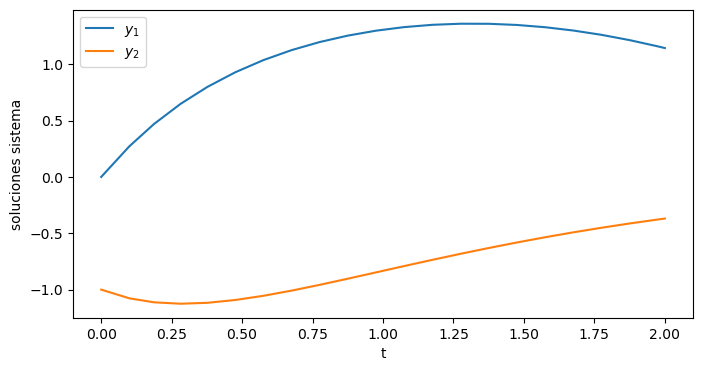

In [50]:
def eq(t,y):
    return np.array([-4*y[0] -2*y[1] + np.cos(t) + 4*np.sin(t),3*y[0] + y[1] -3*np.sin(t)])

a,b = 0,2
y0 = [0,-1]
tol = 1e-6
hmin = 0.001
hmax = 0.1

ts,sol,hs,rs = rkf_sist(eq,a,b,y0,tol,hmin,hmax)

plt.figure(figsize=(8,4))

plt.plot(ts,sol[0])
plt.plot(ts,sol[1])
plt.legend(['$y_1$','$y_2$'])
plt.xlabel("t")
plt.ylabel("soluciones sistema")

Comparamos con las soluciones exactas.

Text(0.5, 1.0, 'Errores en aproximacion')

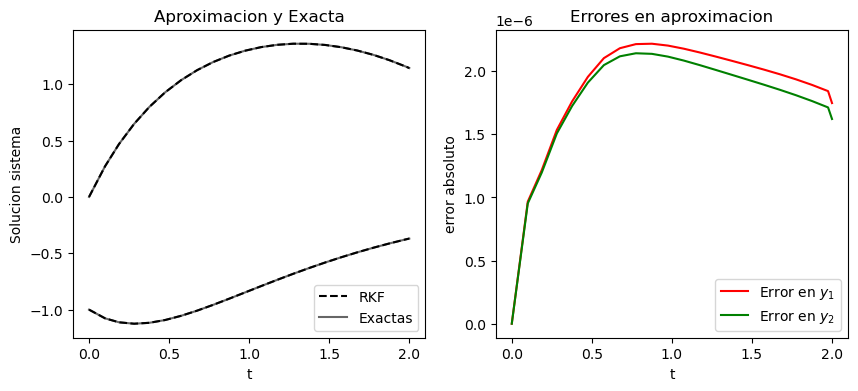

In [51]:
def exactas(t):
    return np.array([2*np.exp(-t) -2*np.exp(-2*t) + np.sin(t) , -3*np.exp(-t) + 2*np.exp(-2*t)])

e1,e2 = exactas(ts)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.plot(ts,sol[0],color='black',ls='--')
ax1.plot(ts,e1,color='black',alpha=0.6)
ax1.plot(ts,sol[1],color='black',ls='--')
ax1.plot(ts,e2,color='black',alpha=0.6)
ax1.legend(['RKF','Exactas'])
ax1.set_xlabel("t")
ax1.set_ylabel("Solucion sistema")
ax1.set_title('Aproximacion y Exacta')

ax2.plot(ts,np.abs(sol[0] - e1),color='red')
ax2.plot(ts,np.abs(sol[1] - e2),color='green')
ax2.legend(['Error en $y_1$','Error en $y_2$'])
ax2.set_xlabel("t")
ax2.set_ylabel("error absoluto")
ax2.set_title('Errores en aproximacion')

La aproximacion funciona bien

# Calificación: 7.0

Los docstrings y explicaciones son demasiado breves. Se recomienda ser más explícito.